# Import

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pickle

# Load

In [55]:
df_read = pd.read_csv('./chrome_data.csv', names=['article_id','domain','url','amlk','title','lang','created','user','extV'])

In [63]:
df_read.tail()

,article_id,domain,url,amlk,title,lang,created,user,extV
65885,66085,ynet.co.il,"http://www.ynet.co.il/articles/0,7340,L-503106...",בית הדין של איגוד הכדורסל קנס את המועדון ב-46 ...,"הפועל ת""א ספגה קנס כבד במיוחד‏",iw,2017-10-19 19:09:39,b93fe4722d772442ac2679359b7303a16ea5d8d97e4897...,2.1.4.5
65886,66086,ynet.co.il,"http://www.ynet.co.il/articles/0,7340,L-503107...","ימת באיקל שבסיביר. עליות בתיירות, בטכנולוגיה, ...",אסון באגם העמוק בעולם,iw,2017-10-19 19:12:29,b93fe4722d772442ac2679359b7303a16ea5d8d97e4897...,2.1.4.5
65887,66087,walla.co.il,https://news.walla.co.il/item/3104845,משרד הדתות משיק פרויקט בשיתוף הסוכנות היהודית ...,NaN,iw,2017-10-19 20:37:18,f87591e2515d5a662d8293ed71bd221b92c65aa117e2d9...,2.1.4.5
65888,66088,walla.co.il,https://food.walla.co.il/item/3104186,1. מוחיטו - עלול להכיל חיידקים מעלי הנענע\n2. ...,NaN,iw,2017-10-19 20:39:49,f87591e2515d5a662d8293ed71bd221b92c65aa117e2d9...,2.1.4.5
65889,66089,walla.co.il,https://finance.walla.co.il/item/3104894,כמעט חודשיים עברו מאז פתיחת סניף דקאתלון בראשו...,מדפים ריקים ועובדים משועממים: כך נראה סניף דקא...,iw,2017-10-19 20:41:10,f87591e2515d5a662d8293ed71bd221b92c65aa117e2d9...,2.1.4.5


# Explore

In [57]:
g = df_read.groupby('domain').article_id.agg('count').sort_values(ascending=False)
domains = g.iloc[:3].index.tolist()

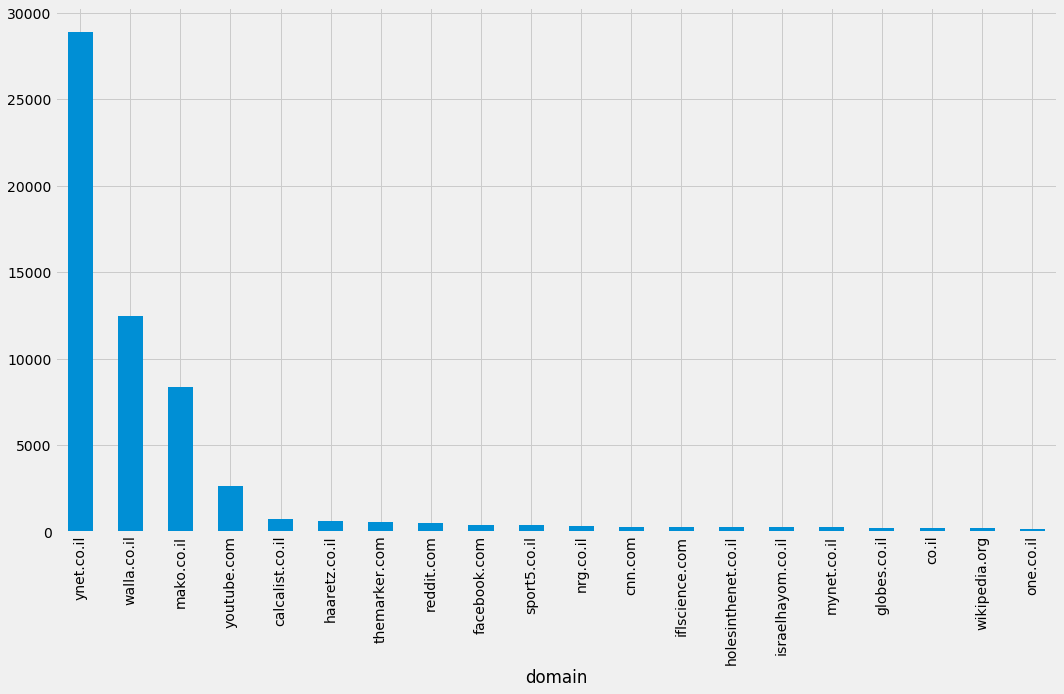

In [64]:
fig, ax = plt.subplots(figsize=(16,9))
g.iloc[:20].plot.bar()

In [68]:
print (df.columns.tolist())

['article_id', 'domain', 'url', 'amlk', 'title', 'lang', 'created', 'user', 'extV']


In [70]:
df = df_read[df_read.domain.isin(domains)][['article_id', 'domain', 'url', 'amlk', 'title', 'lang', 'created']]

In [71]:
df[df.title.notnull()].count()

article_id    34173
domain        34173
url           34173
amlk          34130
title         34173
lang          24648
created       34173
dtype: int64

# Crawl

In [208]:
articles = df.url.tolist()
len(sites)
contents = {}
# with open('./contents.p', 'rb') as f:
#     contents = pickle.load(f)

In [212]:
for i,article in tqdm(enumerate(articles)):
    if article in contents: continue
    r = requests.get(article)
    contents[article] = r.content
    if i%50 == 1:
        with open('./contents.p', 'wb') as f:
            pickle.dump(contents, f)

24499it [4:06:43,  2.42s/it]  

MemoryError: 

In [206]:
contents[articles[0]]

b'<!DOCTYPE html><!--\n"\xd7\xa4\xd7\xa9\xd7\x98\xd7\x95\xd7\xaa \xd7\x94\xd7\x99\xd7\x90 \xd7\x94\xd7\xaa\xd7\x97\xd7\x9b\xd7\x95\xd7\x9d \xd7\x94\xd7\x9e\xd7\x95\xd7\xa9\xd7\x9c\xd7\x9d"\n\xd7\x9c\xd7\x90\xd7\x95\xd7\xa0\xd7\xa8\xd7\x93\xd7\x95 \xd7\x93\xd7\x99 \xd7\xa1\xd7\xa8 \xd7\xa4\xd7\x99\xd7\x99\xd7\xa8\xd7\x95 \xd7\x93\xd7\x94 \xd7\x95\xd7\x99\xd7\xa0\xd7\xa6\'\xd7\x99\nFollow us on Twitter:\nhttps://twitter.com/wallacode\n--><html lang="he-IL" xml:lang="he-IL"><head> <script src="/dist/scripts/ads/global-targeting.js?b=1508418742"></script><script async=\'async\' src=\'https://www.googletagservices.com/tag/js/gpt.js\'></script><script>var googletag = googletag || {};\tgoogletag.cmd = googletag.cmd || [];</script><meta charset="UTF-8" /><title>\xd7\x97\xd7\x99\xd7\x99 \xd7\x9e\xd7\x93\xd7\xa3 33: \xd7\x94\xd7\x95\xd7\xa6\xd7\x90\xd7\xaa \xd7\xa1\xd7\xa4\xd7\xa8\xd7\x99\xd7\x9d \xd7\x9e\xd7\x97\xd7\xa4\xd7\xa9\xd7\xaa \xd7\xa0\xd7\xa9\xd7\x99\xd7\x9d \xd7\xa9\xd7\x99\xd7\xa1\x

In [87]:
df[df.url == 'https://news.walla.co.il/item/3104845'].

65887    משרד הדתות משיק פרויקט בשיתוף הסוכנות היהודית ...
Name: amlk, dtype: object

In [72]:
r = requests.get('https://news.walla.co.il/item/3104845')

In [ ]:
s

In [183]:
soup.find_all('p')

[<p>המדינה תשקיע יותר משלושה מיליון שקל בפרויקט העמקת זהות יהודית בקרב חיילים משוחררים, בשיתוף הסוכנות היהודית. ביום שני האחרון הוציא משרד האוצר בקשה להתקשרות עם הסוכנות במיזם לצורך המשך פרויקט העמקת זהות יהודית בקרב חיילים משוחררים לתקופה של חצי שנה. היקף ההתקשרות המבוקש יעמוד על 2.37 מיליון שקל, והיקף ההתקשורת של המשרד יעמוד על 1.1 מיליון שקל.</p>,
 <p>מטרת הפרויקט היא לספק "ליווי מקצועי הכולל עיסוק מעמיק" בנושא הזהות יהודית עבור חיילים משוחררים. במסגרת הפרויקט נערכים מפגשי לימוד שבועיים בהם מתקיימות הרצאות וסדנאות הנשענות על המקורות היהודיים. תכני הלימוד נבחרו על ידי ועדת ההיגוי, תוך התבססות על פיילוט שנערך בשנים 2013-2014.</p>,
 <p><b>עוד בוואלה! NEWS:</b><br/><br/><br/></p>,
 <p>"חוק המעמד" מקנה לסוכנות היהודית את הסמכות לפעול עבור המדינה לפיתוח ויישוב ארץ ישראל, עלייה וקליטה. מכוח החוק נחתמה בין הממשלה לסוכנות אמנה ב-1954, שהוחלפה כעבור 25 שנים. תקנות חובת המכרזים מקנות פטור ממכרז להתקשרויות של הממשלה עם הסוכנות למטרות ציבוריות. המשנה ליועץ המשפטי לממשלה, עו"ד דינה זילבר, קבעה ב-